<a href="https://colab.research.google.com/github/anjali20082/PerfEval/blob/master/CorrelationAnalysis_PythonNotebooks/Response_Time_Analysis/response_times.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone_PerfEval/ResponseTimes_DeviceSpecific/jumbo_feature.csv')
df

,FEATURE,STUDENT,ANDROID,DISTANCE,RAM,LATENCY,TIME_OF_DAY,NET_TYPE,PING_MEDIAN_GOOGLE,PING_MEDIAN_AMAZON,PING_MEDIAN_MOBIKWIK,PING_VARIANCE_GOOGLE,PING_VARIANCE_AMAZON,PING_VARIANCE_MOBIKWIK,PING_MIN_GOOGLE,PING_MIN_AMAZON,PING_MIN_MOBIKWIK
0,Youtube_search channel page,vandana20106@iiitd.ac.in,11,0.000000,8,1008,1,0,8.35,12.20,32.0,53.536932,310.423162,47.857387,3.49,3.57,25.9
1,Youtube_open channel page,vandana20106@iiitd.ac.in,11,0.000000,8,1836,1,0,8.35,12.20,32.0,53.536932,310.423162,47.857387,3.49,3.57,25.9
2,Youtube_search video page,vandana20106@iiitd.ac.in,11,0.000000,8,1209,1,0,8.35,14.50,31.5,60.708051,336.357735,63.212699,3.49,3.57,25.9
3,Youtube_play video page,vandana20106@iiitd.ac.in,11,0.000000,8,4080,1,0,8.35,14.50,31.5,60.708051,336.357735,63.212699,3.49,3.57,25.9
4,LinkedIn_my profile page,vandana20106@iiitd.ac.in,11,0.000000,8,102,1,0,7.43,16.70,30.2,98.971308,370.749097,98.904576,3.35,3.57,25.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26353,Whatsapp_sending message,akhil20107@iiitd.ac.in,6,0.564232,10,1644,1,1,55.85,69.85,76.0,574.744244,192.536123,3758.935986,34.40,49.70,55.9
26354,GoogleMaps_searching place,akhil20107@iiitd.ac.in,6,0.564232,10,4386,1,1,56.15,69.80,74.5,573.754775,231.027901,7175.290809,34.40,49.70,55.9
26355,GoogleNews_opening news page,akhil20107@iiitd.ac.in,6,0.564232,10,2766,1,1,58.50,70.40,74.8,540.281067,275.775695,7499.583795,34.40,49.70,55.9
26356,Dailyhunt_opening news page,akhil20107@iiitd.ac.in,6,0.564232,10,1896,1,1,60.25,74.80,76.3,486.110176,296.824275,7479.584976,34.40,49.70,55.9


In [ ]:
distances = df[['DISTANCE']].values[:, 0]
ping_median_google = np.median(df['PING_MEDIAN_GOOGLE'])
ping_median_google

50.0

In [ ]:
len(df['STUDENT'].unique())

52

In [ ]:
df[['FEATURE', 'STUDENT','LATENCY']]

,FEATURE,STUDENT,LATENCY
0,Youtube_search channel page,vandana20106@iiitd.ac.in,1008
1,Youtube_open channel page,vandana20106@iiitd.ac.in,1836
2,Youtube_search video page,vandana20106@iiitd.ac.in,1209
3,Youtube_play video page,vandana20106@iiitd.ac.in,4080
4,LinkedIn_my profile page,vandana20106@iiitd.ac.in,102
...,...,...,...
26353,Whatsapp_sending message,akhil20107@iiitd.ac.in,1644
26354,GoogleMaps_searching place,akhil20107@iiitd.ac.in,4386
26355,GoogleNews_opening news page,akhil20107@iiitd.ac.in,2766
26356,Dailyhunt_opening news page,akhil20107@iiitd.ac.in,1896


In [ ]:
df.loc[df['STUDENT'] == 'infinix_pro_night', 'STUDENT'] = 'infinix_pro'
df.loc[(df['STUDENT'] != 'infinix_pro') & (df['STUDENT'] != 'samsung_s10'), 'STUDENT'] = 'Others'
df

,FEATURE,STUDENT,ANDROID,DISTANCE,RAM,LATENCY,TIME_OF_DAY,NET_TYPE,PING_MEDIAN_GOOGLE,PING_MEDIAN_AMAZON,PING_MEDIAN_MOBIKWIK,PING_VARIANCE_GOOGLE,PING_VARIANCE_AMAZON,PING_VARIANCE_MOBIKWIK,PING_MIN_GOOGLE,PING_MIN_AMAZON,PING_MIN_MOBIKWIK
0,Youtube_search channel page,Others,11,0.000000,8,1008,1,0,8.35,12.20,32.0,53.536932,310.423162,47.857387,3.49,3.57,25.9
1,Youtube_open channel page,Others,11,0.000000,8,1836,1,0,8.35,12.20,32.0,53.536932,310.423162,47.857387,3.49,3.57,25.9
2,Youtube_search video page,Others,11,0.000000,8,1209,1,0,8.35,14.50,31.5,60.708051,336.357735,63.212699,3.49,3.57,25.9
3,Youtube_play video page,Others,11,0.000000,8,4080,1,0,8.35,14.50,31.5,60.708051,336.357735,63.212699,3.49,3.57,25.9
4,LinkedIn_my profile page,Others,11,0.000000,8,102,1,0,7.43,16.70,30.2,98.971308,370.749097,98.904576,3.35,3.57,25.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26353,Whatsapp_sending message,Others,6,0.564232,10,1644,1,1,55.85,69.85,76.0,574.744244,192.536123,3758.935986,34.40,49.70,55.9
26354,GoogleMaps_searching place,Others,6,0.564232,10,4386,1,1,56.15,69.80,74.5,573.754775,231.027901,7175.290809,34.40,49.70,55.9
26355,GoogleNews_opening news page,Others,6,0.564232,10,2766,1,1,58.50,70.40,74.8,540.281067,275.775695,7499.583795,34.40,49.70,55.9
26356,Dailyhunt_opening news page,Others,6,0.564232,10,1896,1,1,60.25,74.80,76.3,486.110176,296.824275,7479.584976,34.40,49.70,55.9


In [ ]:
group = df.groupby(['FEATURE','STUDENT']).apply(lambda x: x['LATENCY'].unique())
group

FEATURE                      STUDENT    
Amazon_add to cart clicked   Others         [1120, 2028, 2314, 1011, 1041, 1929, 1190, 106...
                             samsung_s10    [44191, 44494, 44279, 43445, 37311, 37498, 905...
Amazon_go to cart clicked    Others         [2245, 3571, 3487, 3310, 4248, 3688, 2473, 278...
                             samsung_s10    [21553, 24915, 24743, 24223, 11687, 17094, 173...
Amazon_product profile page  Others         [4168, 5419, 4894, 3655, 3397, 4847, 3262, 236...
                                                                  ...                        
Youtube_search channel page  infinix_pro    [1401, 1347, 1069, 1656, 1072, 1084, 1067, 106...
                             samsung_s10    [831, 894, 843, 867, 866, 859, 878, 865, 845, ...
Youtube_search video page    Others         [1209, 1232, 1292, 1265, 1176, 1210, 1224, 124...
                             infinix_pro    [1057, 1042, 1072, 1064, 1054, 1053, 1321, 125...
                   

In [ ]:
# df = group.apply(pd.Series)

# df.reset_index(inplace=True)
df[['APP', 'ACTION']] = df['FEATURE'].str.split('_', expand=True)
df[['APP', 'ACTION', 'STUDENT']]
df[df['APP'] == 'Facebook']

,FEATURE,STUDENT,ANDROID,DISTANCE,RAM,LATENCY,TIME_OF_DAY,NET_TYPE,PING_MEDIAN_GOOGLE,PING_MEDIAN_AMAZON,PING_MEDIAN_MOBIKWIK,PING_VARIANCE_GOOGLE,PING_VARIANCE_AMAZON,PING_VARIANCE_MOBIKWIK,PING_MIN_GOOGLE,PING_MIN_AMAZON,PING_MIN_MOBIKWIK,APP,ACTION
8,Facebook_search results page,Others,11,0.000000,8,3323,1,0,5.625,7.28,29.50,83.821201,216.048205,121.937026,3.15,3.61,25.2,Facebook,search results page
9,Facebook_person profile page,Others,11,0.000000,8,830,1,0,5.625,7.28,29.50,83.821201,216.048205,121.937026,3.15,3.61,25.2,Facebook,person profile page
19,Facebook_search results page,Others,11,0.000000,8,3014,1,1,45.400,48.70,44.05,5292.115086,3397.619119,2999.738220,18.60,21.60,18.4,Facebook,search results page
20,Facebook_person profile page,Others,11,0.000000,8,1766,1,1,45.400,48.70,44.05,5292.115086,3397.619119,2999.738220,18.60,21.60,18.4,Facebook,person profile page
30,Facebook_search results page,Others,11,0.000000,8,3972,0,0,16.600,15.30,39.55,79.129925,144.399450,232.998275,3.55,3.68,25.9,Facebook,search results page
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26311,Facebook_search results page,Others,6,0.564232,10,2843,1,0,21.000,23.00,38.50,292.552873,1734.429194,120.276347,16.80,19.20,32.1,Facebook,search results page
26312,Facebook_person profile page,Others,6,0.564232,10,1734,1,0,21.000,23.00,38.50,292.552873,1734.429194,120.276347,16.80,19.20,32.1,Facebook,person profile page
26339,Facebook_person profile page,Others,6,0.564232,10,4324,1,1,66.400,76.00,81.40,149.895848,254.282015,238.503222,45.70,46.20,50.3,Facebook,person profile page
26340,Facebook_search results page,Others,6,0.564232,10,1962,1,1,63.900,75.75,82.60,164.364744,254.035373,257.530498,44.80,46.20,50.3,Facebook,search results page


In [ ]:
plt.rcParams.update({'figure.autolayout': True})
mlt.rcParams['figure.figsize'] = 14, 10
boxprops = dict(linewidth=4)
medianprops = dict(linewidth=4)

SMALL_SIZE = 12
MEDIUM_SIZE = 22
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [ ]:
df

,FEATURE,STUDENT,ANDROID,DISTANCE,RAM,LATENCY,TIME_OF_DAY,NET_TYPE,PING_MEDIAN_GOOGLE,PING_MEDIAN_AMAZON,PING_MEDIAN_MOBIKWIK,PING_VARIANCE_GOOGLE,PING_VARIANCE_AMAZON,PING_VARIANCE_MOBIKWIK,PING_MIN_GOOGLE,PING_MIN_AMAZON,PING_MIN_MOBIKWIK,APP,ACTION
0,Youtube_search channel page,Others,11,0.000000,8,1008,1,0,8.35,12.20,32.0,53.536932,310.423162,47.857387,3.49,3.57,25.9,Youtube,search channel page
1,Youtube_open channel page,Others,11,0.000000,8,1836,1,0,8.35,12.20,32.0,53.536932,310.423162,47.857387,3.49,3.57,25.9,Youtube,open channel page
2,Youtube_search video page,Others,11,0.000000,8,1209,1,0,8.35,14.50,31.5,60.708051,336.357735,63.212699,3.49,3.57,25.9,Youtube,search video page
3,Youtube_play video page,Others,11,0.000000,8,4080,1,0,8.35,14.50,31.5,60.708051,336.357735,63.212699,3.49,3.57,25.9,Youtube,play video page
4,LinkedIn_my profile page,Others,11,0.000000,8,102,1,0,7.43,16.70,30.2,98.971308,370.749097,98.904576,3.35,3.57,25.3,LinkedIn,my profile page
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26353,Whatsapp_sending message,Others,6,0.564232,10,1644,1,1,55.85,69.85,76.0,574.744244,192.536123,3758.935986,34.40,49.70,55.9,Whatsapp,sending message
26354,GoogleMaps_searching place,Others,6,0.564232,10,4386,1,1,56.15,69.80,74.5,573.754775,231.027901,7175.290809,34.40,49.70,55.9,GoogleMaps,searching place
26355,GoogleNews_opening news page,Others,6,0.564232,10,2766,1,1,58.50,70.40,74.8,540.281067,275.775695,7499.583795,34.40,49.70,55.9,GoogleNews,opening news page
26356,Dailyhunt_opening news page,Others,6,0.564232,10,1896,1,1,60.25,74.80,76.3,486.110176,296.824275,7479.584976,34.40,49.70,55.9,Dailyhunt,opening news page


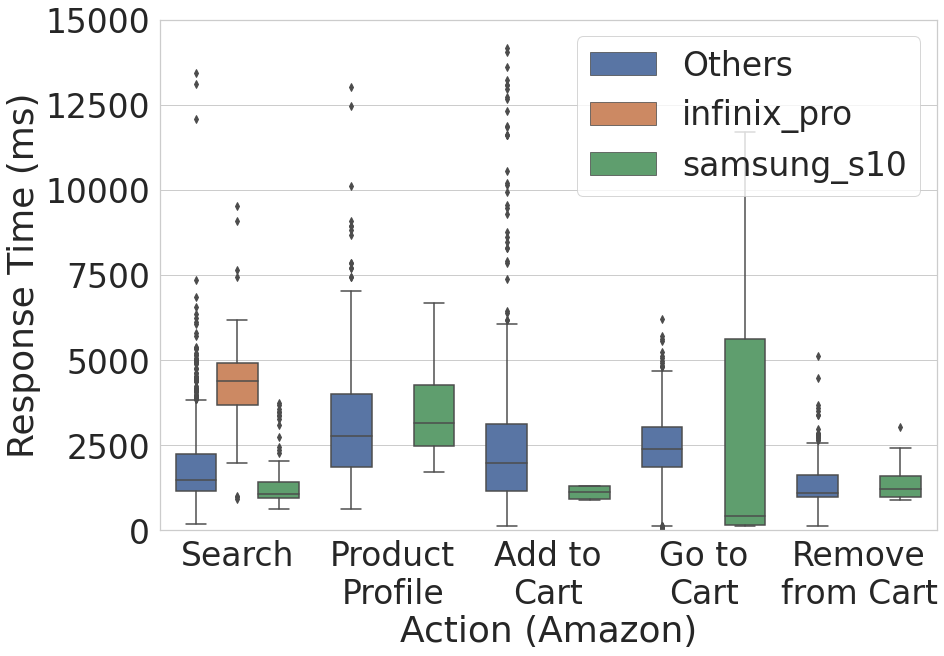

In [ ]:
amazon_df = df[df['APP'] == 'Amazon']
# print(amazon_df['ACTION'])
import seaborn as sns
sns.set(font_scale = 3)
sns.set_style("whitegrid")
ax = sns.boxplot(x = amazon_df['ACTION'],
            y = amazon_df['LATENCY'],
            hue = amazon_df['STUDENT']).set(xlabel='Action (Amazon)', ylabel='Response Time (ms)')
# plt.xticks(rotation=15)
locs, labels = plt.xticks()
plt.ylim(0, 15000)
plt.xticks(locs, ['Search', 'Product\nProfile', 'Add to\nCart', 'Go to\nCart', 'Remove\nfrom Cart'])
plt.legend(title=None)
# plt.show()
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/ResponseTimes_DeviceSpecific/Plots_Ordered/'+'amazon.pdf', bbox_inches='tight')

(0.0, 7000.0)

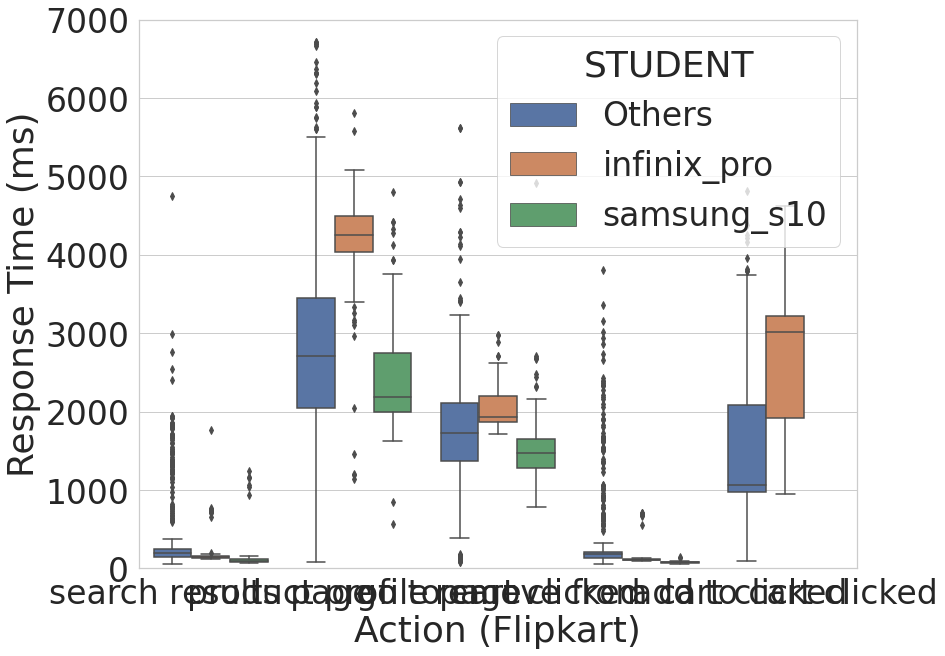

In [ ]:
flip_df = df[df['APP'] == 'Flipkart']
import seaborn as sns
sns.boxplot(x = flip_df['ACTION'],
            y = flip_df['LATENCY'],
            hue = flip_df['STUDENT']).set(xlabel='Action (Flipkart)', ylabel='Response Time (ms)')
# plt.xticks(rotation=15)
plt.ylim(0, 7000)
# plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/ResponseTimes_DeviceSpecific/Plots/'+'Flipkart.pdf', bbox_inches='tight')

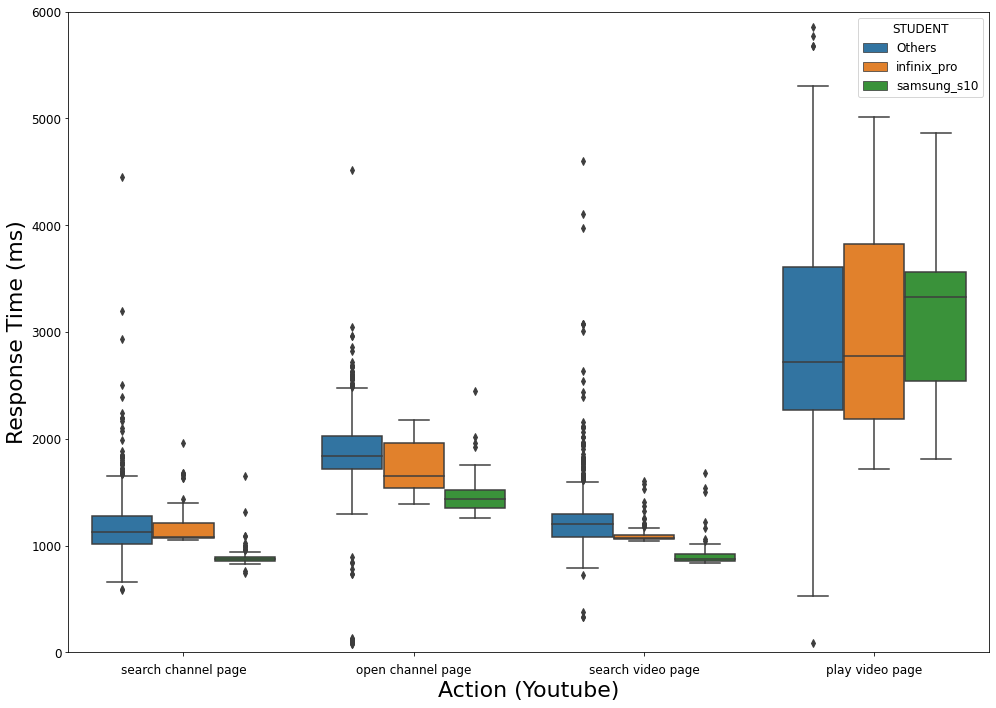

In [ ]:
ytb_df = df[df['APP'] == 'Youtube']
import seaborn as sns
sns.boxplot(x = ytb_df['ACTION'],
            y = ytb_df['LATENCY'],
            hue = ytb_df['STUDENT']).set(xlabel='Action (Youtube)', ylabel='Response Time (ms)')
# plt.xticks(rotation=15)
plt.ylim(0, 6000)
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/ResponseTimes_DeviceSpecific/Plots/'+'Youtube.pdf', bbox_inches='tight')

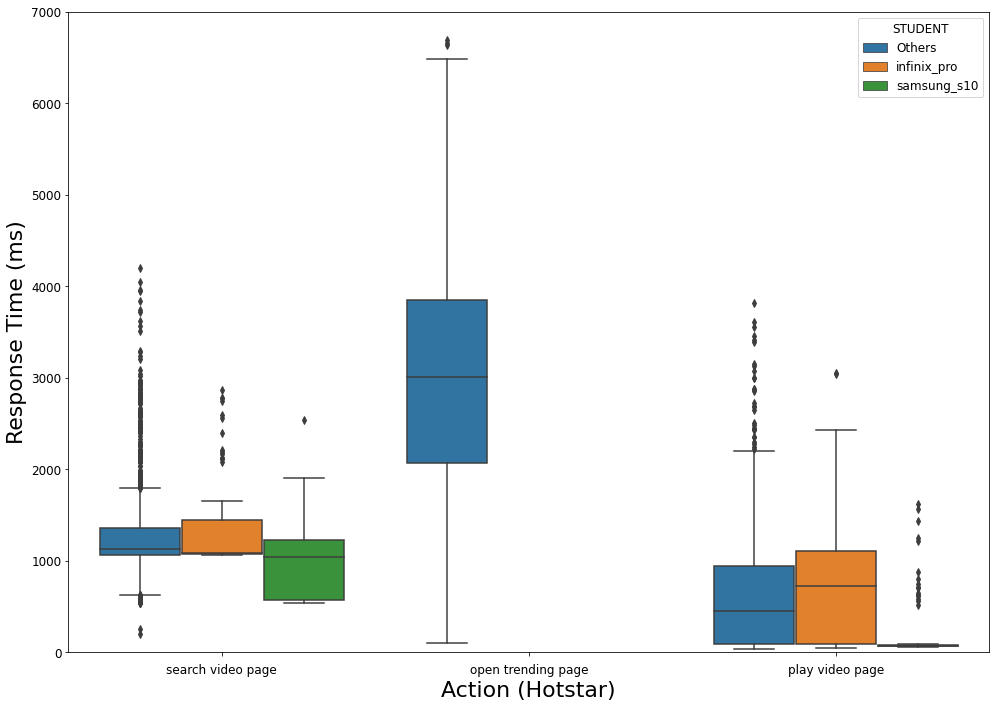

In [ ]:
hotstar_df = df[df['APP'] == 'Hotstar']
import seaborn as sns
sns.boxplot(x = hotstar_df['ACTION'],
            y = hotstar_df['LATENCY'],
            hue = hotstar_df['STUDENT']).set(xlabel='Action (Hotstar)', ylabel='Response Time (ms)')
# plt.xticks(rotation=15)
plt.ylim(0, 7000)
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/ResponseTimes_DeviceSpecific/Plots/'+'Hotstar.pdf', bbox_inches='tight')

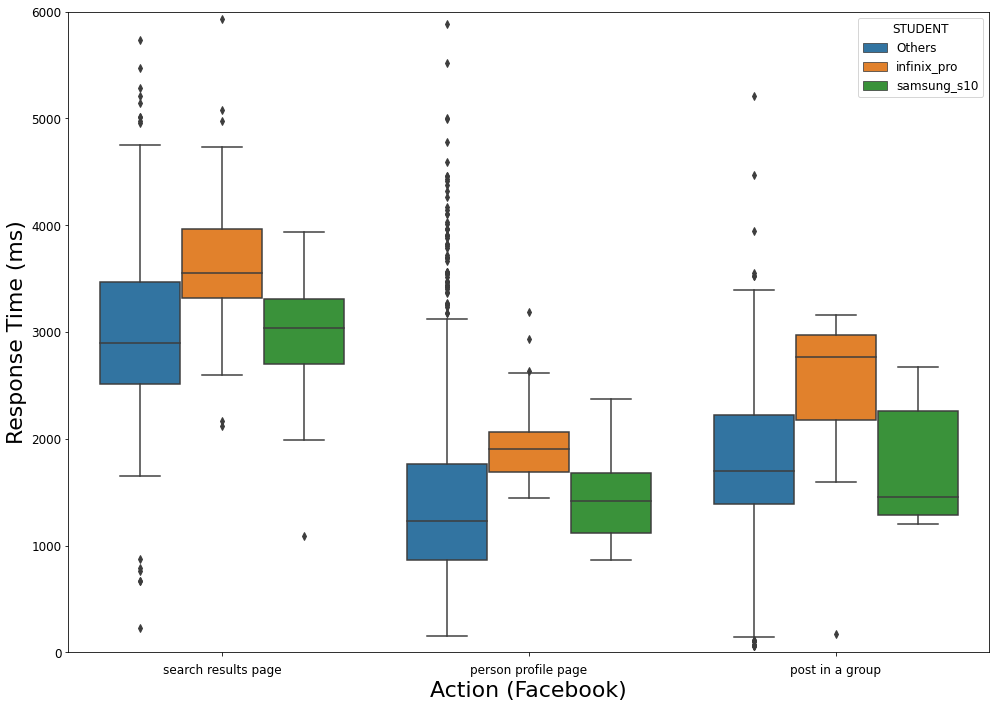

In [ ]:
fb_df = df[df['APP'] == 'Facebook']
# print(fb_df['LATENCY'])
import seaborn as sns
sns.boxplot(x = fb_df['ACTION'],
            y = fb_df['LATENCY'],
            hue = fb_df['STUDENT']).set(xlabel='Action (Facebook)', ylabel='Response Time (ms)')
# plt.xticks(rotation=15)
plt.ylim(0, 6000)
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/ResponseTimes_DeviceSpecific/Plots/'+'Facebook.pdf', bbox_inches='tight')

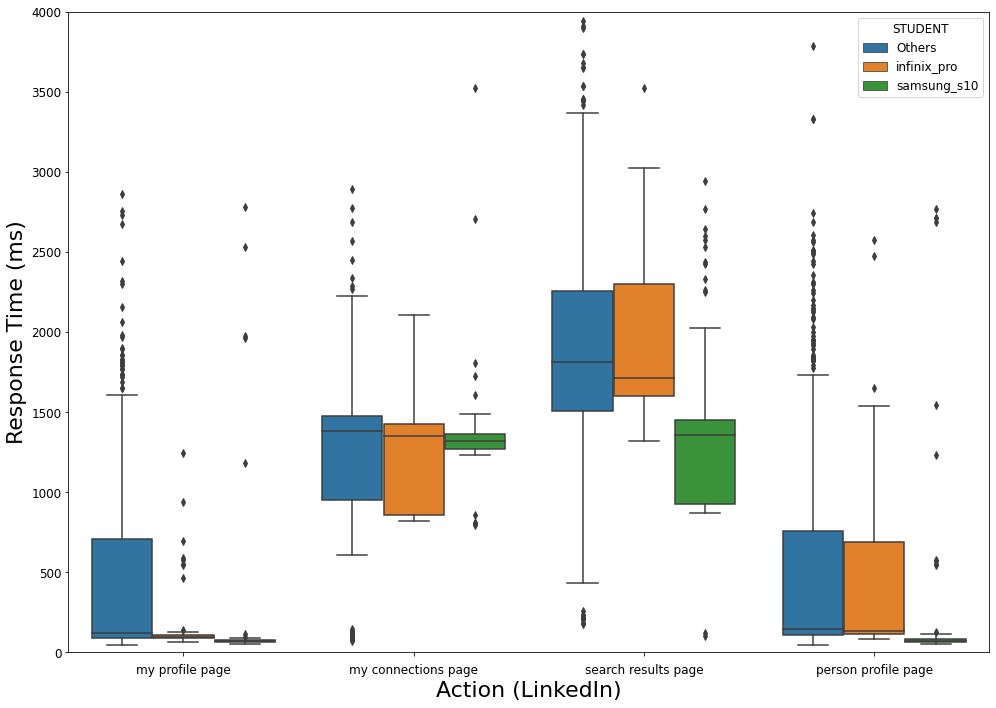

In [ ]:
lkd_df = df[df['APP'] == 'LinkedIn']
import seaborn as sns
sns.boxplot(x = lkd_df['ACTION'],
            y = lkd_df['LATENCY'],
            hue = lkd_df['STUDENT']).set(xlabel='Action (LinkedIn)', ylabel='Response Time (ms)')
# plt.xticks(rotation=15)
plt.ylim(0, 4000)
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/ResponseTimes_DeviceSpecific/Plots/'+'LinkedIn.pdf', bbox_inches='tight')

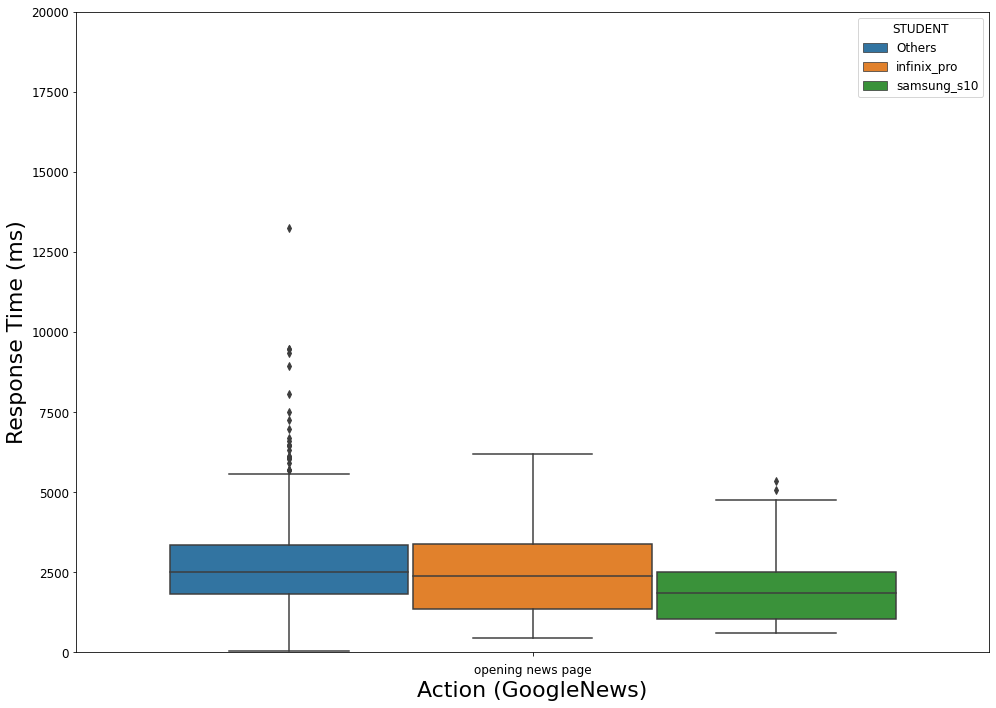

In [ ]:
gnews_df = df[df['APP'] == 'GoogleNews']
import seaborn as sns
sns.boxplot(x = gnews_df['ACTION'],
            y = gnews_df['LATENCY'],
            hue = gnews_df['STUDENT']).set(xlabel='Action (GoogleNews)', ylabel='Response Time (ms)')
plt.ylim(0, 20000)
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/ResponseTimes_DeviceSpecific/Plots/'+'GoogleNews.pdf', bbox_inches='tight')

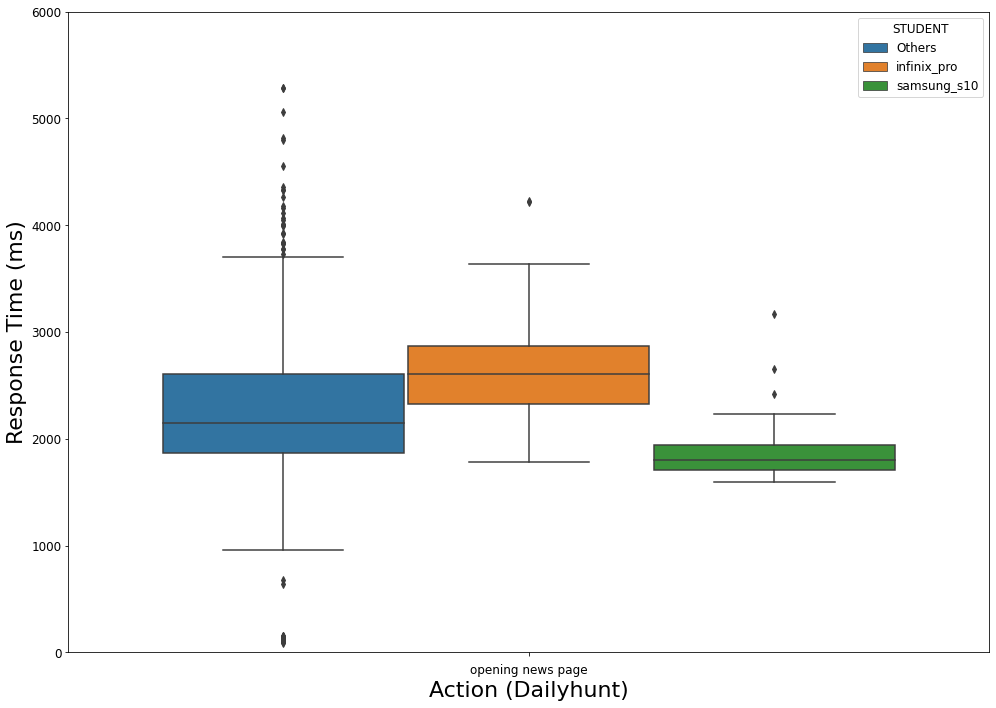

In [ ]:
dlyhunt_df = df[df['APP'] == 'Dailyhunt']
import seaborn as sns
ax = sns.boxplot(x = dlyhunt_df['ACTION'],
            y = dlyhunt_df['LATENCY'],
            hue = dlyhunt_df['STUDENT']).set(xlabel='Action (Dailyhunt)', ylabel='Response Time (ms)')
plt.ylim(0, 6000)
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/ResponseTimes_DeviceSpecific/Plots/'+'Dailyhunt.pdf', bbox_inches='tight')

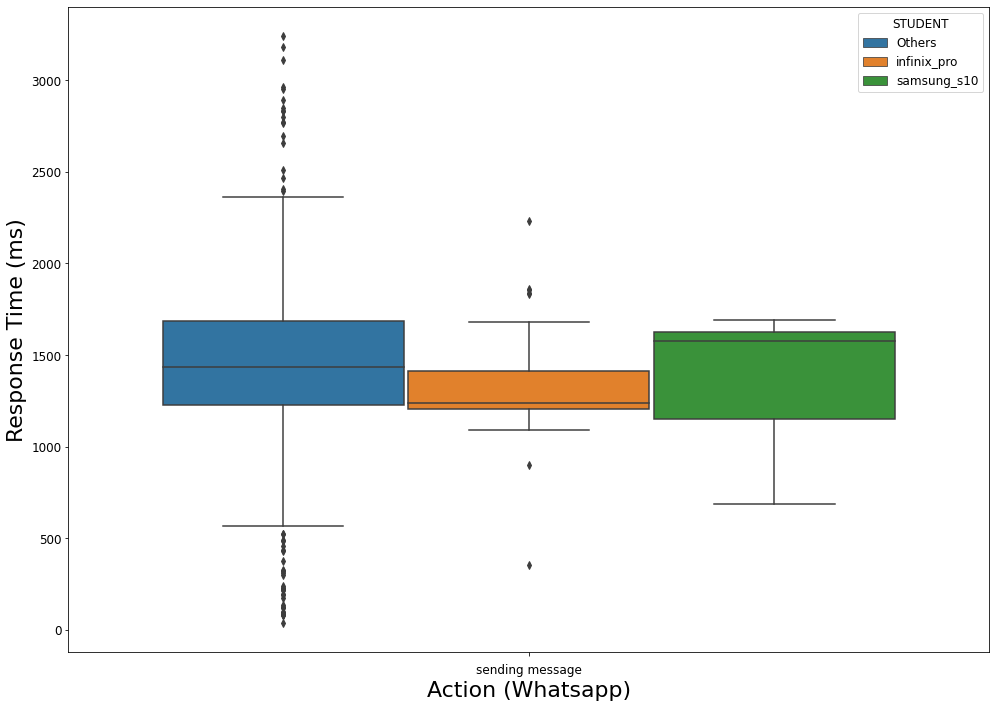

In [ ]:
wtsapp_df = df[df['APP'] == 'Whatsapp']
import seaborn as sns
ax = sns.boxplot(x = wtsapp_df['ACTION'],
            y = wtsapp_df['LATENCY'],
            hue = wtsapp_df['STUDENT']).set(xlabel='Action (Whatsapp)', ylabel='Response Time (ms)')
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/ResponseTimes_DeviceSpecific/Plots/'+'Whatsapp.pdf', bbox_inches='tight')

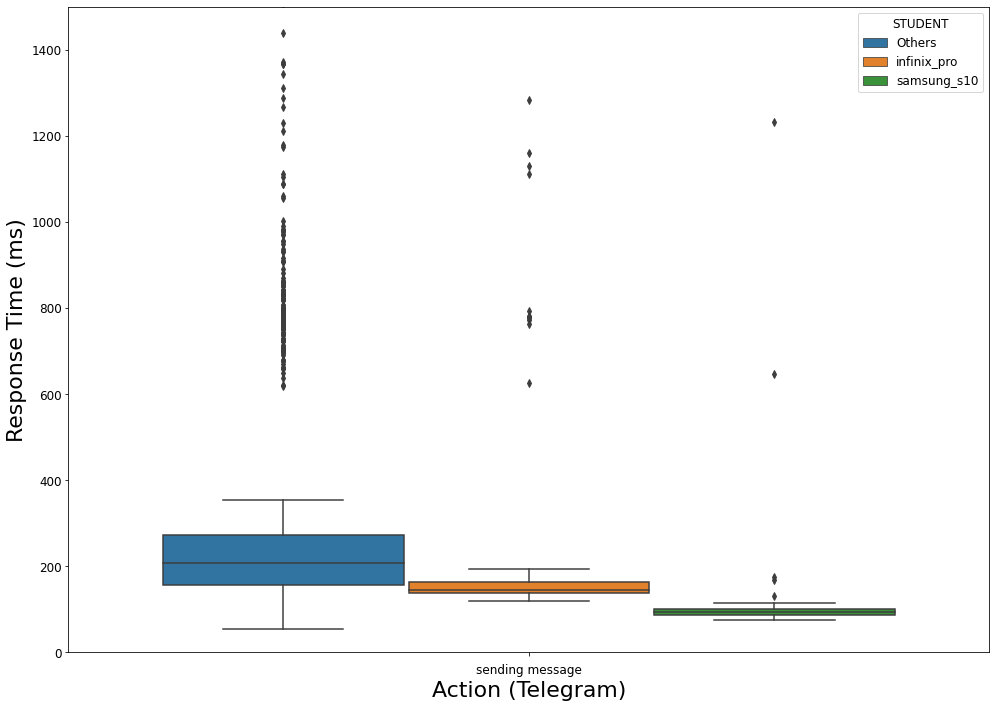

In [ ]:
telegram_df = df[df['APP'] == 'Telegram']
import seaborn as sns
ax = sns.boxplot(x = telegram_df['ACTION'],
            y = telegram_df['LATENCY'],
            hue = telegram_df['STUDENT']).set(xlabel='Action (Telegram)', ylabel='Response Time (ms)')
plt.ylim(0, 1500)
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/ResponseTimes_DeviceSpecific/Plots/'+'Telegram.pdf', bbox_inches='tight')

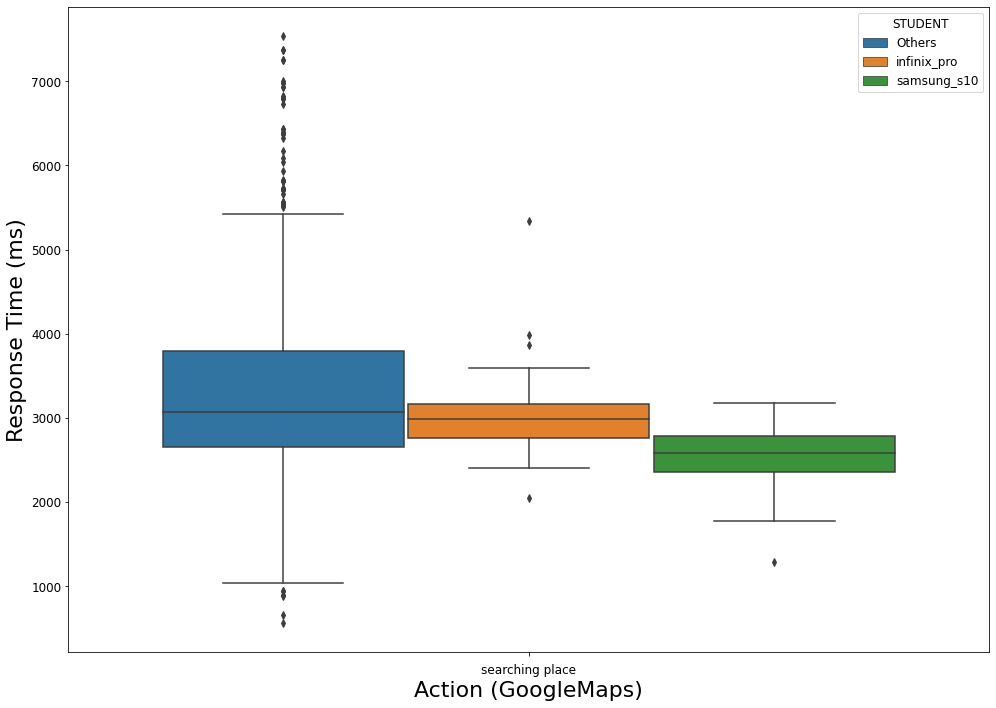

In [ ]:
gmaps_df = df[df['APP'] == 'GoogleMaps']
import seaborn as sns
ax = sns.boxplot(x = gmaps_df['ACTION'],
            y = gmaps_df['LATENCY'],
            hue = gmaps_df['STUDENT']).set(xlabel='Action (GoogleMaps)', ylabel='Response Time (ms)')
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/ResponseTimes_DeviceSpecific/Plots/'+'GoogleMaps.pdf', bbox_inches='tight')

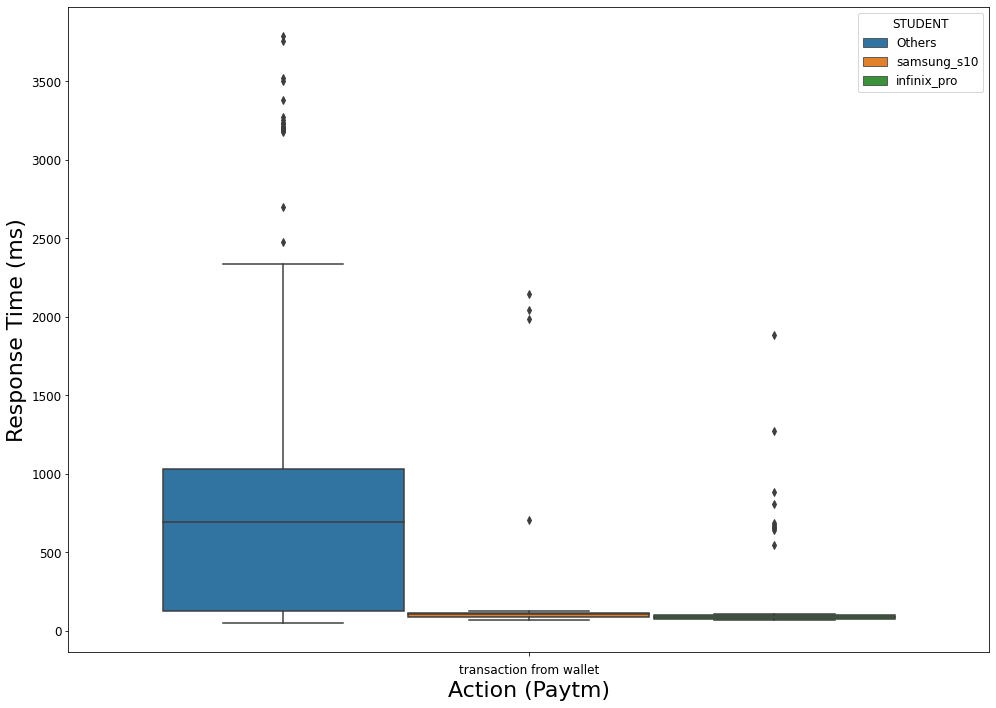

In [ ]:
paytm_df = df[df['APP'] == 'Paytm']
paytm_df = paytm_df[paytm_df.ACTION != 'person profile page']
import seaborn as sns
ax = sns.boxplot(x = paytm_df['ACTION'],
            y = paytm_df['LATENCY'],
            hue = paytm_df['STUDENT']).set(xlabel='Action (Paytm)', ylabel='Response Time (ms)')
plt.savefig('/content/drive/MyDrive/Capstone_PerfEval/ResponseTimes_DeviceSpecific/Plots/'+'Paytm.pdf', bbox_inches='tight')

In [ ]:
df['STUDENT'].unique()

array(['Others', 'infinix_pro', 'samsung_s10'], dtype=object)